<a href="https://colab.research.google.com/github/ukasz21/learning/blob/main/ml_tutorials/ml_fromscratch/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KNN**

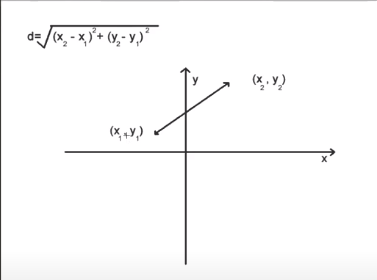

more proper way n - number of dimensions

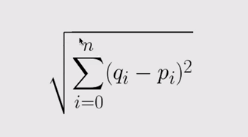

In [46]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

class KNN:

  def __init__(self, k=3): # default value is set to 3
    self.k = k

  def fit(self, X, y): # we need training samples and training labels
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    #compute distances
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    #get k nearest samples, labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    #majority vote, most common class label
    most_common = Counter(k_nearest_labels).most_common(1)

    return most_common[0][0]


In [44]:
a = [1,2,1,2,3,4,2]
most_common = Counter(a).most_common(1)
print(most_common[0][0])

2


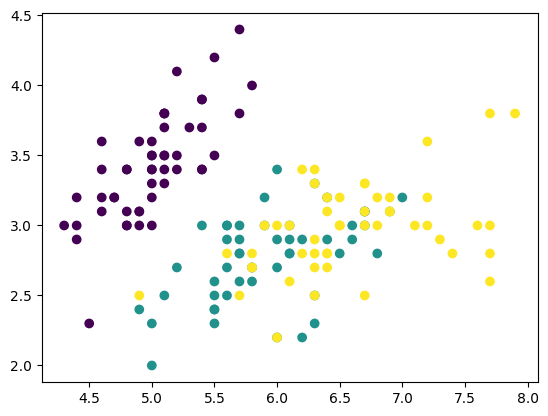

In [38]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y) # first two features


testing clasifier

In [52]:
clf = KNN(k=3)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

1.0
